In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv('/content/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
200121,133294.0,1.375476,-2.786363,-1.695100,-1.028698,-1.678077,-1.079367,-0.098118,-0.486423,-1.367397,...,-0.103864,-0.891799,-0.111621,0.018289,-0.382058,-0.378898,-0.100937,0.028172,500.00,0.0
200122,133294.0,0.031606,0.773669,0.105631,-0.808392,0.661654,-0.533962,0.881970,-0.011293,-0.220876,...,-0.242999,-0.574380,0.006483,-0.509041,-0.466568,0.151427,0.239923,0.081814,4.86,0.0
200123,133294.0,2.165230,0.086752,-2.637062,0.002226,0.836449,-1.508721,0.910290,-0.545427,0.281584,...,0.256355,0.869628,-0.165058,0.774845,0.745217,0.432576,-0.115054,-0.086475,4.72,0.0
200124,133295.0,2.019314,-1.317748,-0.055056,-0.954619,-1.372413,0.226414,-1.570607,0.288708,0.251998,...,0.327501,0.840711,0.274308,0.700951,-0.512369,-0.283217,0.024523,-0.033014,44.80,0.0
200125,133295.0,1.963235,-0.526202,-0.312086,0.319440,-0.680923,-0.105586,-0.773203,0.118093,1.059372,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200126 entries, 0 to 200125
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    200126 non-null  float64
 1   V1      200126 non-null  float64
 2   V2      200126 non-null  float64
 3   V3      200126 non-null  float64
 4   V4      200126 non-null  float64
 5   V5      200126 non-null  float64
 6   V6      200126 non-null  float64
 7   V7      200126 non-null  float64
 8   V8      200126 non-null  float64
 9   V9      200126 non-null  float64
 10  V10     200126 non-null  float64
 11  V11     200126 non-null  float64
 12  V12     200126 non-null  float64
 13  V13     200126 non-null  float64
 14  V14     200126 non-null  float64
 15  V15     200126 non-null  float64
 16  V16     200126 non-null  float64
 17  V17     200126 non-null  float64
 18  V18     200125 non-null  float64
 19  V19     200125 non-null  float64
 20  V20     200125 non-null  float64
 21  V21     20

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
df['Class'].value_counts()

0.0    199740
1.0       385
Name: Class, dtype: int64

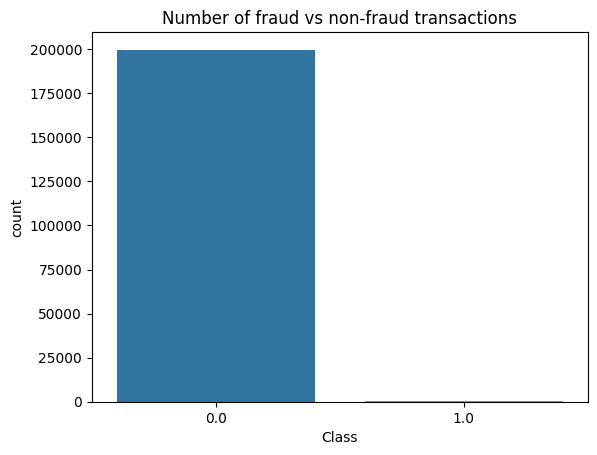

In [ ]:
sns.countplot(x='Class',data=df)
plt.title('Number of fraud vs non-fraud transactions')
plt.show()

In [ ]:
legit=df[df.Class==0.0]
fraud=df[df.Class==1.0]

In [ ]:
print(legit.shape)
print(fraud.shape)

(199740, 31)
(385, 31)


In [ ]:
legit.Amount.describe()

count    199740.000000
mean         89.699438
std         248.677000
min           0.000000
25%           5.990000
50%          23.000000
75%          79.200000
max       19656.530000
Name: Amount, dtype: float64

In [ ]:
#compare values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,70700.829874,-0.093595,-0.005006,0.332133,0.065289,-0.102740,0.048376,-0.037393,0.015301,0.014196,...,0.018590,-0.016177,-0.047228,-0.015312,0.004212,0.060233,0.005997,0.001304,0.001710,89.699438
1.0,61286.968831,-5.697855,4.197893,-7.727879,4.758152,-4.090343,-1.409713,-6.624255,0.684653,-2.761479,...,0.390145,0.791049,-0.022175,-0.054605,-0.070451,0.070767,0.036967,0.177042,0.057351,121.808805


Under Sampling

In [ ]:
legit_sample=legit.sample(n=86)

In [ ]:
new=pd.concat([legit_sample,fraud],axis=0)

In [ ]:
new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
143089,85114.0,-1.101462,0.222608,1.727990,-0.635324,0.036149,-0.184086,0.142751,0.007999,0.093999,...,0.069031,0.461396,-0.100210,0.066456,0.190859,-0.486604,-0.031572,0.100383,35.00,0.0
162884,115464.0,-2.661394,-2.608025,-0.242036,0.389110,2.986238,-2.459701,0.841611,-0.581073,0.072638,...,-0.137631,0.693571,2.358037,-0.114142,0.148980,0.317329,0.206556,-0.277502,12.99,0.0
11725,20049.0,-0.945149,1.068939,1.546351,1.755647,1.358144,-1.102677,0.925867,-0.237994,-0.315663,...,-0.038514,-0.119309,-0.211618,0.304047,0.346450,-0.112368,-0.016076,0.099622,2.50,0.0
81134,58801.0,1.312133,0.628412,-0.780157,0.758545,0.335501,-1.178042,0.386104,-0.274535,-0.101757,...,-0.189088,-0.494524,-0.142561,-0.232196,0.630334,0.400533,-0.032686,0.037375,0.76,0.0
171559,120697.0,-1.605086,0.764552,-0.287905,-0.096908,-0.453732,-0.979086,1.439609,-0.521049,0.239599,...,-0.125322,-0.112797,-0.001748,0.510943,-1.070281,0.077899,-1.021998,0.155807,146.91,0.0


In [ ]:
new.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
192687,129808.0,1.522080,-0.519429,-2.581685,0.774741,0.206722,-1.431020,0.757011,-0.444418,0.997921,...,0.019649,-0.211678,-0.247452,-0.279472,0.239646,-0.508398,-0.015551,0.041881,276.17,1.0
195383,131024.0,0.469750,-1.237555,-1.767341,4.833490,-0.268715,-0.512760,1.140149,-0.341273,-1.046351,...,0.303905,-0.647075,-0.373014,0.260801,-0.496566,-0.245973,-0.117858,0.144774,723.21,1.0
197586,132086.0,-0.361428,1.133472,-2.971360,-0.283073,0.371452,-0.574680,4.031513,-0.934398,-0.768255,...,0.110815,0.563861,-0.408436,-0.880079,1.408392,-0.137402,-0.001250,-0.182751,480.72,1.0
198868,132688.0,0.432554,1.861373,-4.310353,2.448080,4.574094,-2.979912,-2.792379,-2.719867,-0.276704,...,-1.384477,-0.348904,-3.979948,-0.828156,-2.419446,-0.767070,0.387039,0.319402,1.00,1.0
199896,133184.0,-1.212682,-2.484824,-6.397186,3.670562,-0.863375,-1.855855,1.017732,-0.544704,-1.703378,...,1.396872,0.092073,-1.492882,-0.204227,0.532511,-0.293871,0.212663,0.431095,1335.00,1.0


In [ ]:
new['Class'].value_counts()

1.0    385
0.0     86
Name: Class, dtype: int64

In [ ]:
new.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,65017.302326,-0.129335,-0.080522,0.476203,0.039089,-0.019588,-0.076523,0.124975,-0.028096,-0.110530,...,-0.143862,-0.032019,0.012373,-0.025039,-0.015574,0.067730,0.054360,-0.076168,0.087919,75.509884
1.0,61286.968831,-5.697855,4.197893,-7.727879,4.758152,-4.090343,-1.409713,-6.624255,0.684653,-2.761479,...,0.390145,0.791049,-0.022175,-0.054605,-0.070451,0.070767,0.036967,0.177042,0.057351,121.808805


In [ ]:
X=new.drop(columns='Class')
y=new['Class']

In [ ]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
143089   85114.0 -1.101462  0.222608  1.727990 -0.635324  0.036149 -0.184086   
162884  115464.0 -2.661394 -2.608025 -0.242036  0.389110  2.986238 -2.459701   
11725    20049.0 -0.945149  1.068939  1.546351  1.755647  1.358144 -1.102677   
81134    58801.0  1.312133  0.628412 -0.780157  0.758545  0.335501 -1.178042   
171559  120697.0 -1.605086  0.764552 -0.287905 -0.096908 -0.453732 -0.979086   
...          ...       ...       ...       ...       ...       ...       ...   
192687  129808.0  1.522080 -0.519429 -2.581685  0.774741  0.206722 -1.431020   
195383  131024.0  0.469750 -1.237555 -1.767341  4.833490 -0.268715 -0.512760   
197586  132086.0 -0.361428  1.133472 -2.971360 -0.283073  0.371452 -0.574680   
198868  132688.0  0.432554  1.861373 -4.310353  2.448080  4.574094 -2.979912   
199896  133184.0 -1.212682 -2.484824 -6.397186  3.670562 -0.863375 -1.855855   

              V7        V8        V9  .

In [ ]:
print(y)

143089    0.0
162884    0.0
11725     0.0
81134     0.0
171559    0.0
         ... 
192687    1.0
195383    1.0
197586    1.0
198868    1.0
199896    1.0
Name: Class, Length: 471, dtype: float64


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(471, 30) (376, 30) (95, 30)


In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predict_train=lr.predict(X_train)
train_accuracy=accuracy_score(predict_train,y_train)
print('Accuracy score of Train data:',train_accuracy)

Accuracy score of Train data: 0.9654255319148937


In [ ]:
predict_test=lr.predict(X_test)
test_accuracy=accuracy_score(predict_test,y_test)
print('Accuracy score of Test data:',test_accuracy)

Accuracy score of Test data: 0.8842105263157894


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict_test))

              precision    recall  f1-score   support

         0.0       0.65      0.76      0.70        17
         1.0       0.95      0.91      0.93        78

    accuracy                           0.88        95
   macro avg       0.80      0.84      0.82        95
weighted avg       0.89      0.88      0.89        95



In [ ]:
rf=RandomForestClassifier(max_depth=5,max_features=10,n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_features=10)

In [ ]:
rf_predict_test=rf.predict(X_test)
rf_test_accuracy=accuracy_score(rf_predict_test,y_test)
print('Accuracy score of Test data:',rf_test_accuracy)

Accuracy score of Test data: 0.9157894736842105


In [ ]:
print(classification_report(y_test,rf_predict_test))

              precision    recall  f1-score   support

         0.0       0.70      0.94      0.80        17
         1.0       0.99      0.91      0.95        78

    accuracy                           0.92        95
   macro avg       0.84      0.93      0.87        95
weighted avg       0.93      0.92      0.92        95

